In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
from math import trunc

In [2]:
metrics = pd.read_csv('metrics_v3.csv', sep=';')

In [3]:
metrics

,modelName,MAP@10,nDCG@10,Recall@10,Precision@10,MRR@10,Novelty@10,Diversity@10,MAP@20,nDCG@20,Recall@20,Precision@20,MRR@20,Novelty@20,Diversity@20
0,MostPopular,0.008845,0.070085,0.068773,0.008664,0.032376,5.361294,1.000000,0.005235,0.082615,0.080866,0.005144,0.033319,5.735275,1.000000
1,Random,0.000722,0.004614,0.004874,0.000722,0.004392,8.485870,0.812545,0.000632,0.010369,0.009386,0.000542,0.001134,8.497200,0.799723
2,CDL,0.056200,0.063400,0.096800,0.009700,0.056200,7.244830,0.885533,0.056300,0.063400,0.096800,0.004800,0.056100,7.244830,0.846383
3,VBPR,0.001400,0.000000,0.000000,0.000000,0.001100,6.823582,0.795298,0.006400,0.010200,0.032300,0.001600,0.006500,6.940953,0.783363
4,LLaVA-KNN,0.005235,0.044837,0.044224,0.005054,0.029372,8.545793,0.781949,0.003520,0.059834,0.058363,0.003430,0.030457,8.574840,0.751805
5,BLIP-KNN,0.002166,0.017352,0.017148,0.001986,0.009281,8.509801,0.808303,0.001986,0.031094,0.030686,0.001895,0.010522,8.535249,0.775722
6,LightFM + LLaVA,0.003069,0.025185,0.024729,0.003069,0.014034,6.715657,0.963718,0.003249,0.049101,0.048616,0.003159,0.022068,7.222828,0.887726
7,LightFM,0.005957,0.047349,0.047353,0.005776,0.019597,6.093506,0.994585,0.003700,0.059718,0.059747,0.003610,0.015157,6.539386,0.977437


In [4]:
models_and_metrics = {}
models = metrics['modelName']
metrics_for_reclist_10 = metrics.columns[1:8]
metrics_for_reclist_20 = metrics.columns[8:]

for model in models: 
    model_row = metrics[metrics['modelName'] == model]
    model_metrics_10 = model_row[metrics_for_reclist_10].values[0]
    
    model_metrics_20 = model_row[metrics_for_reclist_20].values[0]
    model_metrics = list(zip(model_metrics_10, model_metrics_20))
    models_and_metrics[model] = model_metrics

In [5]:
metrics[metrics['modelName'] == 'MostPopular']

,modelName,MAP@10,nDCG@10,Recall@10,Precision@10,MRR@10,Novelty@10,Diversity@10,MAP@20,nDCG@20,Recall@20,Precision@20,MRR@20,Novelty@20,Diversity@20
0,MostPopular,0.008845,0.070085,0.068773,0.008664,0.032376,5.361294,1.0,0.005235,0.082615,0.080866,0.005144,0.033319,5.735275,1.0


In [6]:
models_and_metrics

{'MostPopular': [(0.0088447653429602, 0.0052346570397111),
  (0.0700851443292924, 0.0826148577627913),
  (0.0687725631768953, 0.0808664259927797),
  (0.0086642599277978, 0.0051444043321299),
  (0.0323756518251103, 0.0333192543449218),
  (5.361293814662297, 5.735274772920034),
  (1.0, 1.0)],
 'Random': [(0.0007220216606498, 0.0006317689530685),
  (0.0046144998373129, 0.0103688669138588),
  (0.0048736462093862, 0.0093862815884476),
  (0.0007220216606498, 0.0005415162454873),
  (0.0043922984356197, 0.0011335099623483),
  (8.485870172117659, 8.497199621412424),
  (0.8125451263537902, 0.7997234361475296)],
 'CDL ': [(0.0562, 0.0563),
  (0.0634, 0.0634),
  (0.0968, 0.0968),
  (0.0097, 0.0048),
  (0.0562, 0.0561),
  (7.24483026, 7.24483026),
  (0.88553345, 0.84638336)],
 'VBPR': [(0.0014, 0.0064),
  (0.0, 0.0102),
  (0.0, 0.0323),
  (0.0, 0.0016),
  (0.0011, 0.0065),
  (6.82358181, 6.94095256),
  (0.79529837, 0.78336347)],
 'LLaVA-KNN': [(0.0052346570397111, 0.0035198555956678),
  (0.04483653

In [7]:
METRICS_NAMES = ['MAP', 'nDCG', 'Recall', 'Precision', 'MRR', 'Novelty', 'Diversity']
SUBMETRICS = ['10', '20']
X = np.arange(len(METRICS_NAMES))
WIDTH = 0.25


In [8]:
idx2metric = { i : metric_name for i, metric_name in enumerate(METRICS_NAMES)}
metric2idx = { v : k for k, v in idx2metric.items() }

In [9]:
def plot_stacked_bars(metric): 
    cols = { submetric : [] for submetric in SUBMETRICS }
    for idx in range(len(SUBMETRICS)):
        for _ ,  metrics in models_and_metrics.items():
            specific_metric = metrics[metric2idx[metric]][idx]
            cols[SUBMETRICS[idx]].append(specific_metric)    


    df = pd.DataFrame(cols, index=models)
    ax = df.plot(kind='barh', stacked=False, color=['blue', 'orange'], figsize=(12, 7), width=0.6)
    
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(
            str(round(width, 5)), 
            (width * 1.01, p.get_y() + p.get_height() / 2), 
            fontsize=7,
            va='center' 
        )
            
    legend_labels = [f"{metric}@{submetric}" for submetric in SUBMETRICS]
    
    ax.legend(legend_labels)
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)
    
    plt.xlabel('Valor')
    plt.xticks(rotation=0)

    plt.ylabel('Modelos')
    plt.tight_layout()
    plt.title(metric)
    
    plt.subplots_adjust(top=0.8)
    plt.tight_layout(pad=2)  

    plt.savefig(f'images/{metric}.png', format='png')
    


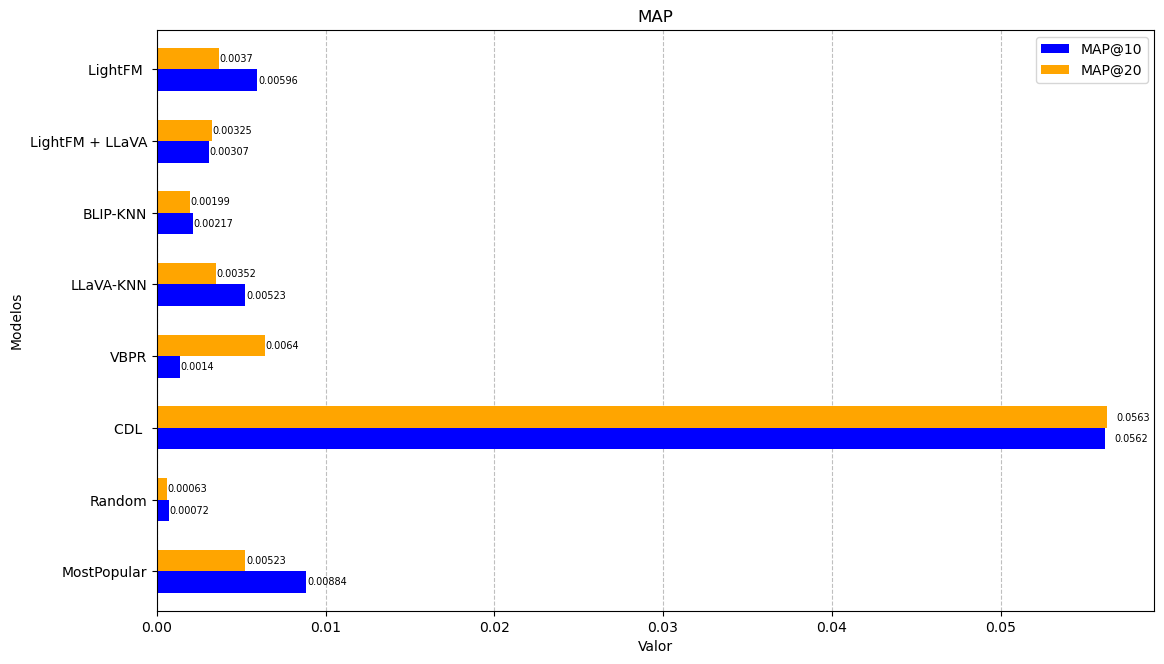

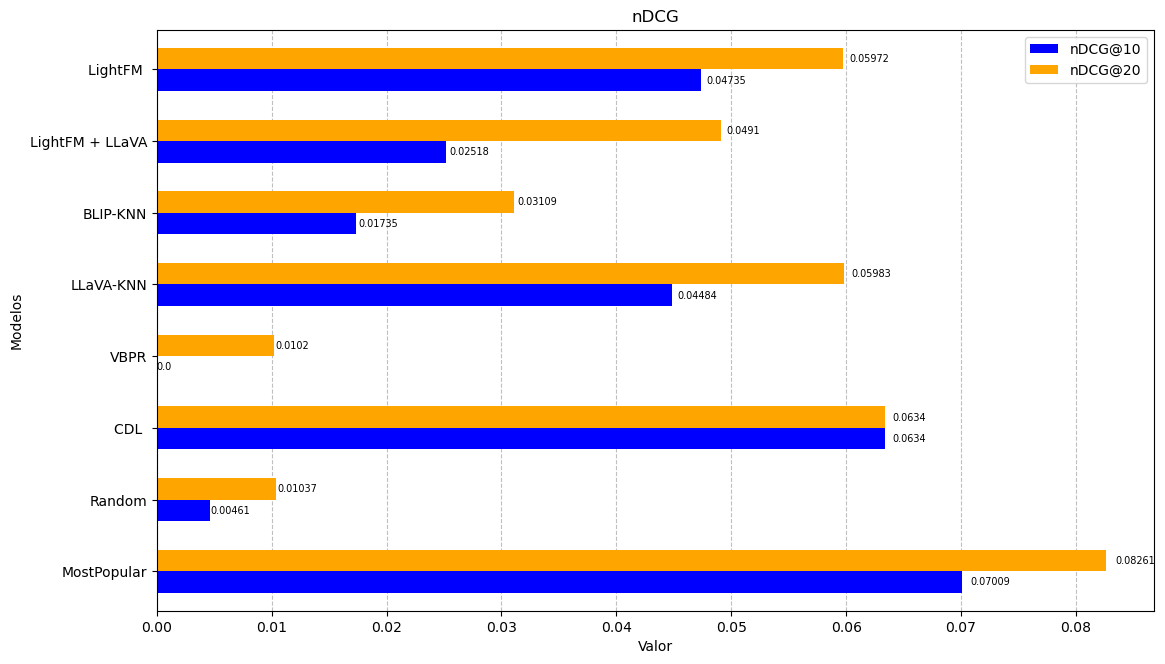

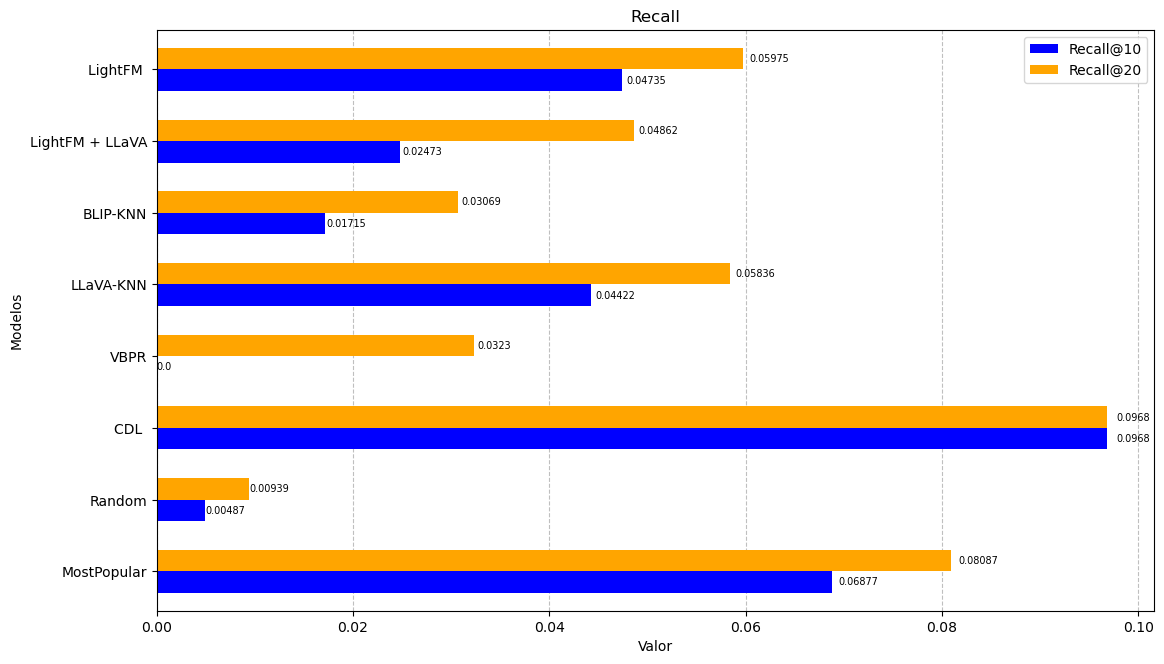

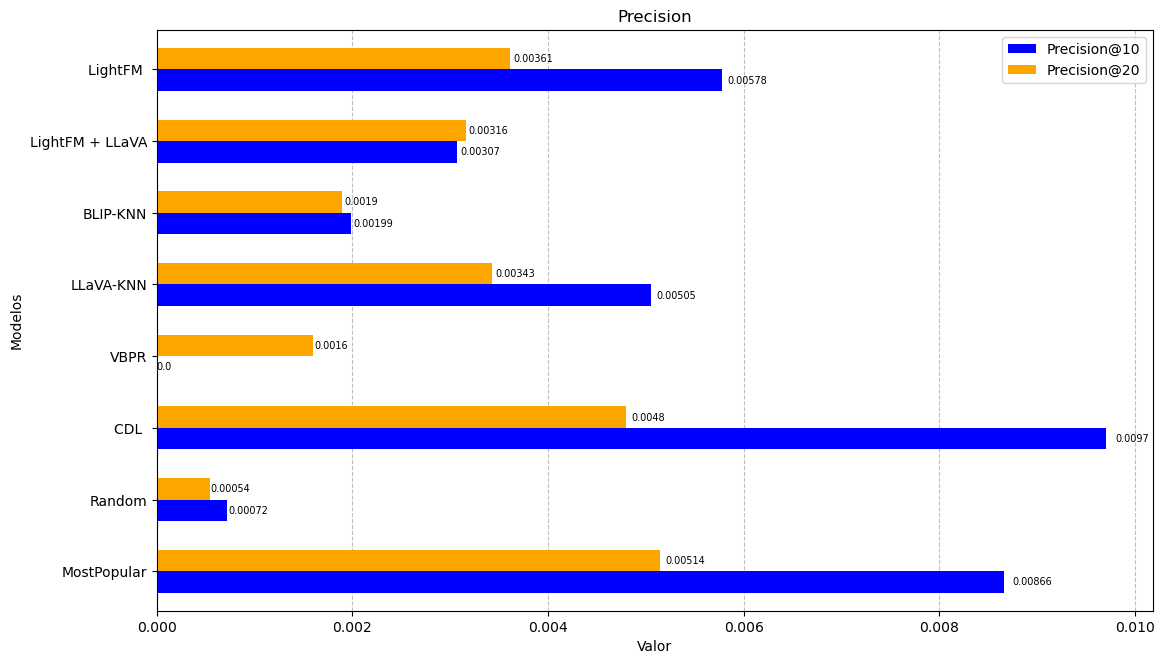

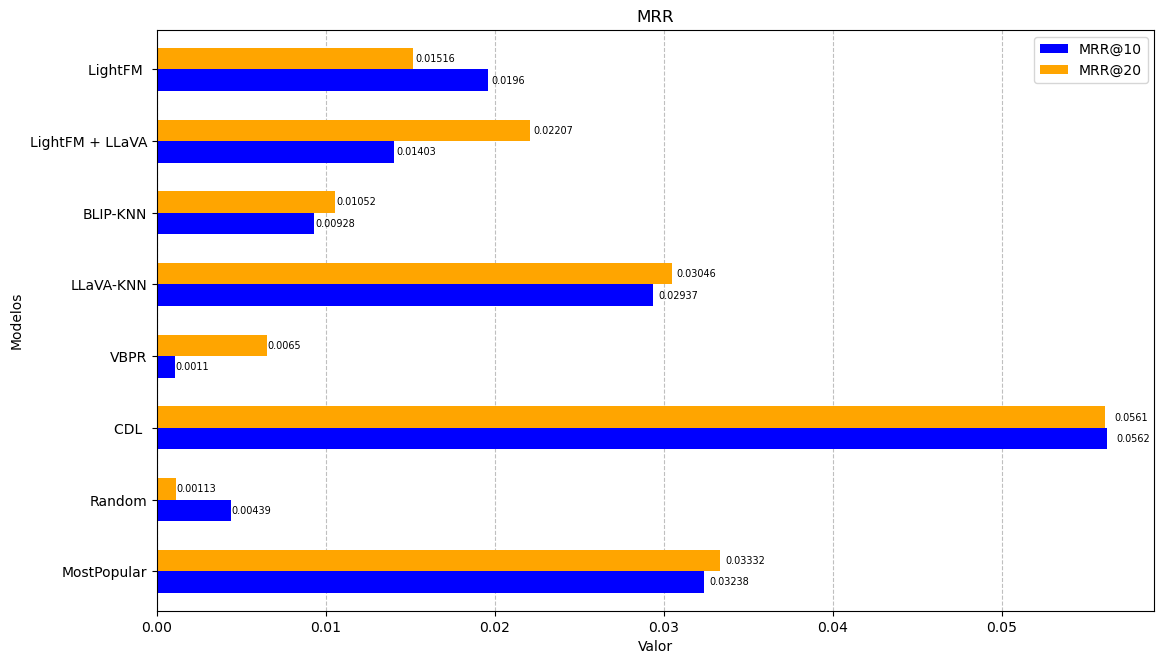

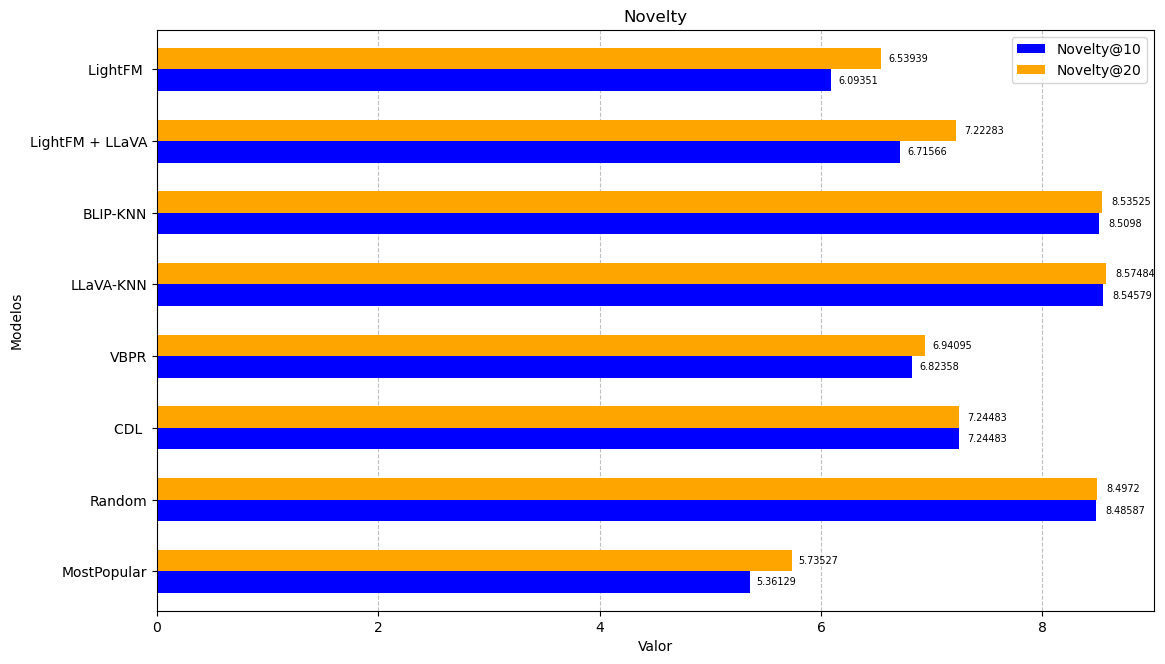

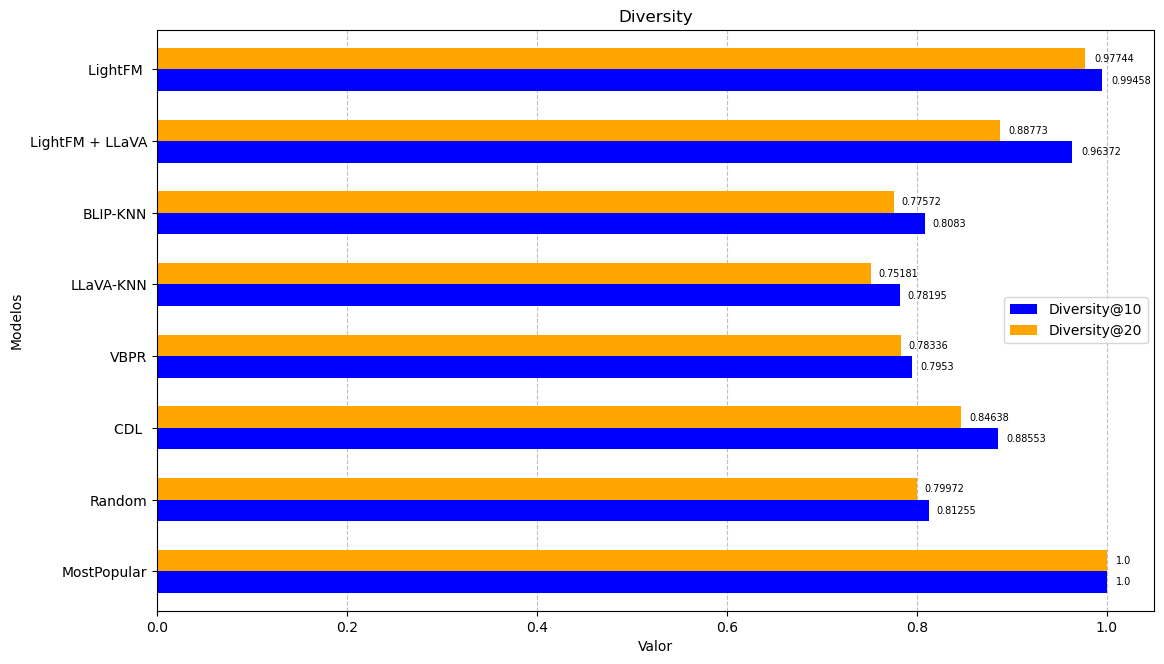

In [11]:
for metric in METRICS_NAMES:
    plot_stacked_bars(metric)